In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture

In [2]:
train = pd.read_excel('estaturas.xlsx', sheet_name='normales')
test = pd.read_excel('estaturas.xlsx', sheet_name='valtest(normales)')

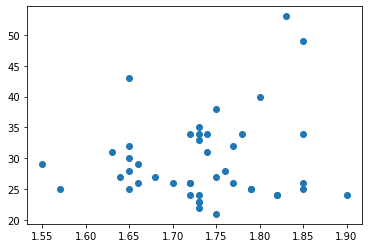

In [3]:
plt.scatter(x=train["Estatura(metros)"], y=train["Edad(años)"])

## K-Means

In [4]:
class k_means:
    def fit(self, train_data, k, max_iteraciones):
        self._centroides = np.zeros((k,2),dtype='float')
        self._classes = np.zeros((len(train_data),1), dtype='int')
        self._distancias = np.zeros((len(train_data),k), dtype='float')
        ## inicializacion centroides
        for i in range(k):
            self._centroides[i][0] = np.random.uniform(train_data.min(axis=0)[0], train_data.max(axis=0)[0])
            self._centroides[i][1] = np.random.uniform(train_data.min(axis=0)[1], train_data.max(axis=0)[1])
        for _ in range(max_iteraciones):
            ## distancias euclideanas
            for i in range(k):
                self._distancias[:,i] = np.linalg.norm(train_data - self._centroides[i,:],axis=1)
            ## asignacion de clases
            self._classes = np.argmin(self._distancias, axis=1)
            ## actualizar centroides
            tempCentroides = np.zeros((k,2),dtype='float')
            for i in range(k):
                tempCentroides[i] = train_data[self._classes==i].mean()
            if ~(self._centroides == tempCentroides).all():
                self._centroides = tempCentroides
            else:
                break
        train_graph = train_data.copy()
        train_graph['cluster'] = self._classes
        plt.scatter(x=train_graph["Estatura(metros)"], y=train_graph["Edad(años)"], c=train_graph["cluster"])
        plt.scatter(x=self._centroides[:,0], y=self._centroides[:,1], c='red', marker='+', linewidth=2)

    def predict(self, test_data):
        distancias = np.zeros((len(test_data),self._centroides.shape[0]), dtype='float')
        for i in range(self._centroides.shape[0]):
                distancias[:,i] = np.linalg.norm(test_data - self._centroides[i,:],axis=1)
        return np.argmin(distancias, axis=1)


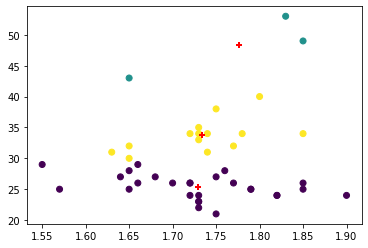

In [49]:
k_means_model = k_means()
k_means_model.fit(train,3,10)

In [15]:
k_means_model._centroides

array([[ 1.77666667, 48.33333333],
       [ 1.72925926, 25.37037037],
       [ 1.73357143, 33.71428571]])

## GMM

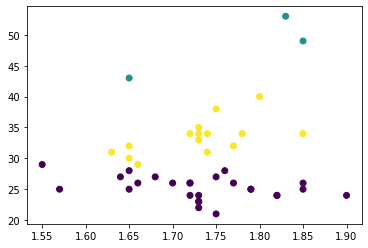

In [30]:
gm = GaussianMixture(n_components=3, random_state=0).fit(train)
train_graph_gm = train.copy()
train_graph_gm['cluster'] = gm.predict(train)
plt.scatter(x=train_graph_gm["Estatura(metros)"], y=train_graph_gm["Edad(años)"], c=train_graph_gm["cluster"])